In [1]:
import os
import random
random.seed(42) 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

# Seaborn style
sns.set(style="whitegrid")

# Load pickle files

In [2]:
PICKLE_DIR = 'pickle'

allocine_df = pd.DataFrame()

files = [file for file in os.listdir(PICKLE_DIR) if file.endswith(".pickle")]
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

for file in files:
    path = os.path.join(PICKLE_DIR, file)
    print("Reading file: " + path)
    df = pd.read_pickle(path)
    print(len(df))
    # print(df)
    allocine_df = pd.concat([allocine_df, df], ignore_index=True)
    
print()
print("Loaded {} reviews !".format(len(allocine_df)))
# allocine_df

Reading file: pickle\allocine_0.pickle
25024
Reading file: pickle\allocine_1.pickle
24458
Reading file: pickle\allocine_2.pickle
23606
Reading file: pickle\allocine_3.pickle
22078
Reading file: pickle\allocine_4.pickle
21434
Reading file: pickle\allocine_5.pickle
18914
Reading file: pickle\allocine_6.pickle
17864
Reading file: pickle\allocine_7.pickle
16404
Reading file: pickle\allocine_8.pickle
14989
Reading file: pickle\allocine_9.pickle
13953

Loaded 198724 reviews !


# Explore data

In [3]:
allocine_df

,film-url,rating,review,date,helpful,unhelpful
0,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs/,5.0,"1917, comme son nom l'indique, raconte l'histoire d'un soldat pendant la 1ère guerre mondiale.<br/>Sam Mendes, réalisateur extrêmement talentueux, signe une fois de plus un bijou de la réalisation.<br/>Ce faux plan séquence apparaît finalement vrai tant la maîtrise y est. Tenu en haleine tout du long par des visuels époustouflants et un George MacKey qui dégage une sincérité folle, on ne voit absolument pas le temps passer. Une fois que l'on lance 1917, on ne peut s'en décrocher avant la fin.<br/>Bien que la force du film passe par sa réalisation magistrale et sa direction d'acting, l'histoire est juste et authentique et la BO plus qu'en adéquation avec son œuvre.<br/>Il est bien évidemment préférable de voir ce film sur grand écran, pour qu'il ne perde pas de sa superbe.<br/>Chef d'œuvre de réalisation, ce qui suffit à lui même : 5/5.",2022-08-21,20,3
1,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs/,4.5,"""Oh non, encore un film de guerre fait par les américains"" me suis-je dit instinctivement avant d'aller voir ""1917"". Mais bon, avec Sam Mendes aux commandes, il y a de quoi s'y risquer... et quels risques ! Je ne m'attendais pas à être autant ""embrigadé"" par le film. Le dispositif du (faux) plan-séquence qui s'étale sur deux heures est immersif au possible et m'a mis en apnée à plusieurs reprises. Pour ceux qui ne vont pas souvent au cinéma, je pense que ""1917"" gagne vraiment à être vu sur grand écran ; c'est du grand spectacle, furieux et magistral ! L'histoire, inspirée des récits du grand-père du réalisateur, raconte la mission périlleuse de deux soldats anglais qui consiste à passer en territoire ennemi afin de livrer un message vital qui sauvera la vie de milliers d'hommes. Le dispositif de Mendes s'articule autour de ce scénario et s'engage à plonger le spectateur dans l'action en ne lâchant jamais les deux protagonistes de vue : George MacKay et Dean-Charles Chapman font d'ailleurs preuve d'une endurance et d'une candeur remarquables. On est très près de leurs corps, avec une musique prégnante et intense, avec des mouvements de caméra absolument dingues, une multitude de décors racontant chacun une page de ce périple mais aussi un nombre incalculable de figurants et d'effets... Bref, une apothéose de cinéma qui transcende et secoue ! On a là une belle prouesse technique et cinématographique qui nous en met plein les yeux et nous donne l'impression d'être sur une montagne-russe... Je suis sorti de la salle éprouvé, comme si j'avais moi aussi parcouru cette longue distance avec les personnages. Cette expérience sensorielle est rare, surtout lorsque l'aspect technique met en valeur l'histoire et vice-versa. Bien entendu, aborder les tranchées de la Première Guerre mondiale fait écho à d'autres, plus récentes, et en cela, Sam Mendes assure un coup de maitre en évitant toute morale et en privilégiant les émotions fortes pour rendre hommage aux héros de guerre.",2020-01-21,50,27
2,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs/,3.5,"Allez soyons franc, « 1917 » est un film de guerre maîtrisé de bout en bout qui vaut son pesant de popcorn. Certains diront blockbuster, d’autres film froid qui retrace sans empathie l’expérience de nos ancêtres… personnellement j’opterais pour film à budget moyen qui se démarque en utilisant une technique certes déjà connue et utilisée, mais une technique quand même : le plan séquence. Sam Mendes avait sans doute l’envie de nous faire vivre en temps réel une mission clé de la survie des troupes alliés lors de la Grande Guerre. C’est réussi. La reconstitution des décors et des costumes est tout simplement splendide. Nous sommes immergés dans un no-man’s land des plus terrifiants et authentiques et nous suivons une course contre la montre qui s’apparente à du suicide.<br/><br/>« 1917 » est donc une bonne retranscription composée 

## Negative reviews

We consider a review is negative when its associating rating is less than or equal to 2.0, which includes 4 categories: 0.5, 1.0, 1.5 and 2.0

In [4]:
negative_reviews = allocine_df[allocine_df['rating'] <= 2.0]
negative_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
89860,https://www.allocine.fr/film/fichefilm-28817/critiques/spectateurs/,0.5,"Conan sort d’une pub pour un déodorant à chaque instant on l’imagine s’enduire le corps de patchouli et nous expliquer que ses dents en porcelaines sont bien blanches grâce à une bonne hygiène dentaire et un paquet de chewing-gum à la chlorophylle. Il est accompagné dans ses aventures d’une ‘pure’ grognasse sortie elle d’une pub Roger Cavailles pour la toilette intime,<br/>Bien sur notre tas de viande aux stéroïdes triomphera de ses ennemis et accomplira sa vengeance grâce son art subtil de la boucherie et sauvera du même coup la dinde aux gros seins qui bien sur écartera les cuisses remerciant de fait notre gros barbare au patchouli.<br/><br/>Voilà tout est dit sur ce navet immonde qui n’aurait jamais du naître.",2011-11-28,5,4
67683,https://www.allocine.fr/film/fichefilm-144631/critiques/spectateurs/,2.0,"Deux étoiles pour l'image et le son, sublimes. Dommage que le fond soit bien en deçà de la forme. Le jeu d'Olivier Barthelemy laisse passablement à désirer et l'histoire n'arrive pas à toucher",2011-01-25,0,1
77690,https://www.allocine.fr/film/fichefilm-195334/critiques/spectateurs/,0.5,"du grand n'importe quoi aucun intérêt je l'ai regardé en 10 minutes à force de zapper. Aucune histoire, aucune comédie. Complètement inutile !",2013-05-08,2,1


## Positive reviews

We consider a review is positive when its associating rating is greater than or equal to to 4.0, which includes 3 categories: 4.0, 4.5 and 5.0

In [5]:
positive_reviews = allocine_df[allocine_df['rating'] >= 4.0]
positive_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
193811,https://www.allocine.fr/film/fichefilm-185184/critiques/spectateurs/,4.5,"Dans la veine de old Boy et seven! Un polar d'une noirceur absolu .... A voir ABSOLUMENT!!! Une vengeance terrifiante et sidérante ... Ça va loin, très loin !!!",2011-07-05,0,1
9930,http://www.allocine.fr/film/fichefilm-14178/critiques/spectateurs/,5.0,"Cinq ans après ""Les Affranchis"", le trio composé de Scorsese, Pesci et de Niro s'associe à nouveau dans un film de gangsters où est décrit avec précision et avec une maîtrise parfaite le rôle majeur de la mafia dans le Las Vegas des années 1970. Le ""réalisateur mitraillette"" ne fait pas dans la dentelle et enchaîne les évènements à grande vitesse pendant près de trois heures. Le scénario est riche, complexe et dépeint à merveille la façon de penser, de s'habiller et d'agir lorsque les grands pontes pillaient par millions les clients des casinos qui se laissaient entraîner par le vice et par le goût indémodable du qui perd gagne. Le film montre bien la grandeur et la décadence de ce milieu tenu par les ordures de la société prêts à tout pour conserver la part d'argent en truquant les bandits manchots, les roulettes et autres accessoires habituels des casinos. Le film est porté par trois immenses figures du cinéma des années 1990 dont Sharon Stone qui avait été révélé au grand public dans le sulfureux ""Basic instinct"" de Verhoeven. Si ""Casino"" ressemble fortement à ""Les Affranchis"" du même auteur et réalisateur, il détient le mérite de poser au spectateur d'autres questions auxquelles il devra réfléchir avant de répondre. Le thème supplémentaire abordé est la naissance d'une petite fille et lorsqu'on assiste à toutes les magouilles et la violence qui se déchaînent entre le père et la mère qui s'entredéchirent, pour des raisons particulières et graves, c'est à se demander comment cette enfant innocente va pouvoir accumuler tout ce qu'elle voit à la télévision et tout ce qu'elle subit par sa mère indigne, qui se drogue, qui se saoûle, qui l'attache à son lit? Cela prouve que dans ce milieu, hommes et femmes qui trempent dans les affaires illégales ne possèdent ni scrupules, ni morale. Le film en lui-même est une grande réussite de Scorsese qui montre bien le soudain revirement des affaires de Las Vegas, l'argent revenant aux compagnies puissantes et non plus à la mafia.",2009-02-17,4,0
136416,https://www.allocine.fr/film/fichefilm-41236/critiques/spectateurs/,5.0,"Très bon film ! Mieux que l'appartement, on rentre plus dans le film, on comprends mieux et surtout ça ne finit pas en queue de poisson !<br/>Pourquoi toujours finir dans le glauque pour que ça plaise aux gens !",2007-11-11,0,1


## Rating counts

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\2041346670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)


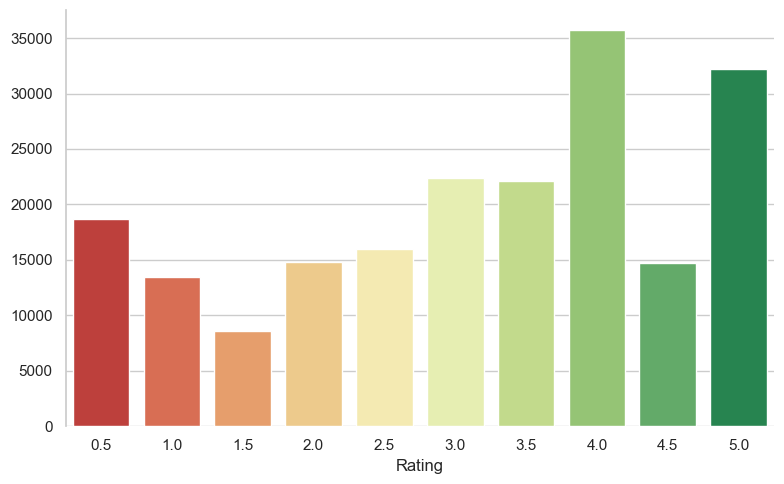

In [7]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=10)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)
ax.set(xlabel='Rating', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/rating_counts.png', dpi=200)

## Polarity

In [8]:
def find_polarity(row):
    if row['rating'] <= 2.0:
        return -1
    elif row['rating'] >= 4.0:
        return 1
    else:
        return 0

allocine_df['polarity'] = allocine_df.apply(lambda row : find_polarity(row), axis=1) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\917972237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\917972237.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


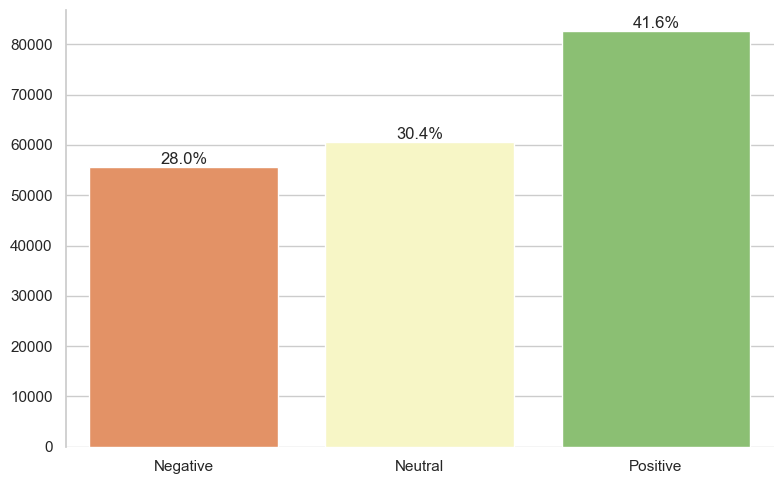

In [9]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
ax.set(xlabel='', ylabel='')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(allocine_df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/polarity_frequency.png', dpi=200)

## Reviews per year

In [10]:
allocine_df['date'] = pd.to_datetime(allocine_df['date'])
reviews_per_year = allocine_df.groupby(allocine_df['date'].dt.year).size()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\29496286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( reviews_per_year.values, palette="GnBu_d")


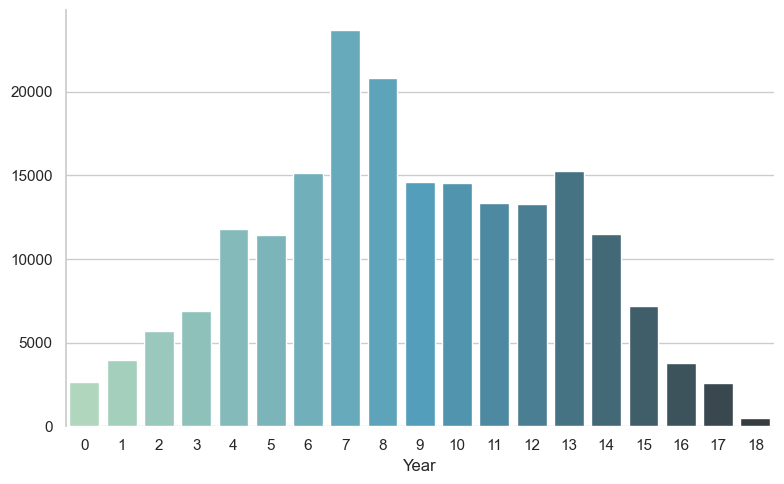

In [11]:
plt.figure(figsize=(8,5))
ax = sns.barplot( reviews_per_year.values, palette="GnBu_d")
ax.set(xlabel='Year', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_per_year.png', dpi=200)

## Reviews length

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\134165326.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))


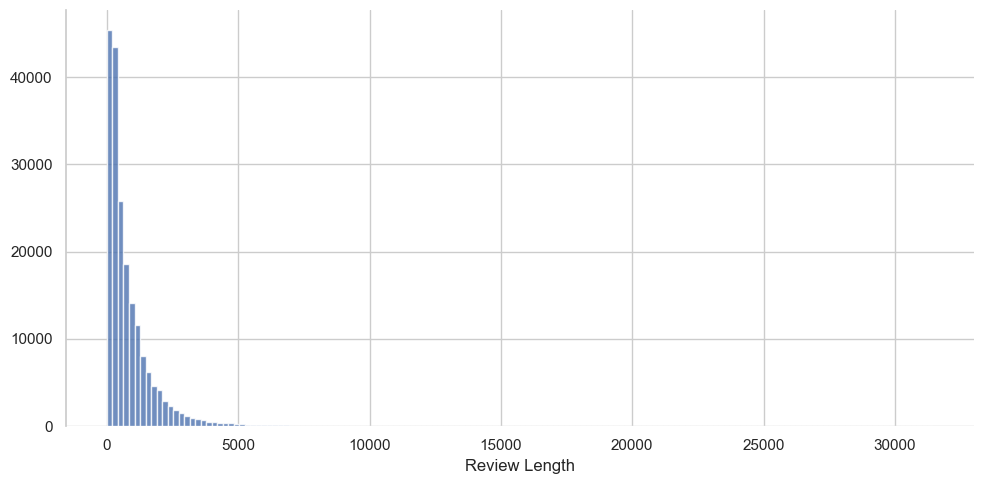

In [12]:
reviews_length = allocine_df['review'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_length.png', dpi=200)

In [13]:
THRESHOLD = 2000
short_reviews = allocine_df[allocine_df['review'].str.len() <= THRESHOLD]
long_reviews =  allocine_df[allocine_df['review'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(allocine_df)
))

18258 reviews with LEN > 2000 (9.19 % of total data)


Example of a long review

In [17]:
long_reviews.head(1)

,film-url,rating,review,date,helpful,unhelpful,polarity
2,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs/,3.5,"Allez soyons franc, « 1917 » est un film de guerre maîtrisé de bout en bout qui vaut son pesant de popcorn. Certains diront blockbuster, d’autres film froid qui retrace sans empathie l’expérience de nos ancêtres… personnellement j’opterais pour film à budget moyen qui se démarque en utilisant une technique certes déjà connue et utilisée, mais une technique quand même : le plan séquence. Sam Mendes avait sans doute l’envie de nous faire vivre en temps réel une mission clé de la survie des troupes alliés lors de la Grande Guerre. C’est réussi. La reconstitution des décors et des costumes est tout simplement splendide. Nous sommes immergés dans un no-man’s land des plus terrifiants et authentiques et nous suivons une course contre la montre qui s’apparente à du suicide.<br/><br/>« 1917 » est donc une bonne retranscription composée de maîtrise historique et technique. Sam Mendes l’a d’ailleurs souligné dans une de ses interviews : « Très peu de films évoquent la Première Guerre Mondiale car c’est une guerre immobile qui consistait à attendre des jours et des jours dans les tranchées pour finalement mourir 200 ou 300 mètres plus loin ». L’originalité de ce film, c’est la singularité d’une petite mission intégrée dans la guerre. Rajouter une petite histoire dans l’histoire.<br/><br/>Contrairement à un film comme « Dunkerque » de Christopher Nolan, « 1917 » ne fait pas un documentaire de la guerre et n’hésite pas à nous donner une dimension héroïque (et ce sans en faire des tonnes non plus). Un homme pour en sauver 1 600 autres, 1 600 autres comme lui. La mission aurait pu être assignée à lui ou à un autre, la finalité aurait été la même. D’où l’importance d’un personnage que l’on suit et qui a un impact tout au long de l’histoire sans pour autant être mis sur un piédestal.<br/><br/>En résumé, « 1917 » est un film prenant et abouti où très peu de défauts peuvent être décelés en termes de technique ou de procédés utilisés. On se croit vraiment sur place avec les poilus. Reste à savoir si c’est un film qui pousse à la réflexion ? Pas nécessairement. Bien entendu on peut repenser aux horreurs de la guerre (villages rasés, faune et flore dévastés) et la souffrance vécue dans les tranchées. Malheureusement ce n’est pas l’objet du film et l’empathie reste assez « légère » dans la narration. Belle claque visuelle toutefois.",2020-01-20,46,31,0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\1813349319.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))


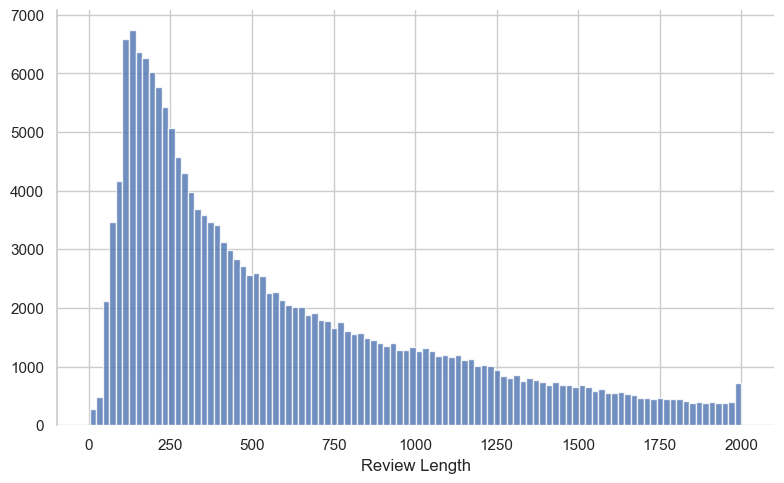

In [18]:
short_reviews_length = short_reviews['review'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/short_reviews_length.png', dpi=200)

In [ ]:
# TODO: other analysis ?
# Histograms of reviews lengths for each rating (negative reviews are shorter ?)

In [ ]:
# Num reviews per film ? => why are we limiting to 30 reviews per film ?

# Build dataset

In [19]:
dataset_df = allocine_df.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 198724


## Remove data we don't need 

In [20]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [21]:
# 1. Drop columns we don't need
dataset_df = dataset_df.drop(columns=['rating', 'date', 'helpful', 'unhelpful'])

# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['polarity'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 3. Remove long reviews
LENGTH_THRESH = 2000
dataset_df = dataset_df[dataset_df['review'].str.len() <= LENGTH_THRESH]
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 4. Limit number of reviews per film
"""
MAX_REVIEWS_PER_FILM = 30
grouped = dataset_df.groupby('film-url')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_FILM:
        sampling_size = num_reviews - MAX_REVIEWS_PER_FILM
        ids_to_drop = random.sample(list(ids), sampling_size)
        dataset_df = dataset_df.drop(ids_to_drop)
        
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))
"""
# Total loss
length, percentage = loss_percentage(dataset_df, initial_len)
print("Total loss: (-{:.1f} %)".format(percentage))

Length: 138239 (-30.4 %)
Length: 125791 (-9.0 %)
Total loss: (-36.7 %)


In [22]:
# Change -1 to 0 for negative polarity
dataset_df.loc[dataset_df['polarity'] == -1, 'polarity'] = 0

In [23]:
dataset_df.groupby('polarity').size()

polarity
0    51624
1    74167
dtype: int64

## Clean review text

In [24]:
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['review'] = dataset_df['review'].apply(clean_text)

## Remove empty reviews

In [25]:
# Remove reviews with less than 3 characters
# Done after text processing on purpose
dataset_df = dataset_df[dataset_df['review'].str.len() > 2]

In [26]:
dataset_df.sample(5, random_state=42)

,film-url,review,polarity
118339,https://www.allocine.fr/film/fichefilm-43023/critiques/spectateurs/,"Grotesque... Ce film, si on peut appeler ça un film, est ridicule ! On réchauffe le premier opus en y introduisant des acteurs mauvais et un peu plus de sang... Fuyez !",0
101323,https://www.allocine.fr/film/fichefilm-103409/critiques/spectateurs/,"Un trés grand Western signé Phil Karlson dont c'est le premier long métrage que je visionne de ce cinéaste méconnu et dont il me tarde de voir le reste de sa filmographie !! J'ai regardé ce film par curiosité pour l'un des acteurs principaux qui se nomme Van Heflin dont j'ai apprécié le peu de longs métrages que j'ai vu qui choisit bien ses roles et dans ce qu'il a tourné. ""Le salaire de la violence"" est un Western dramatique familiale, deux frères de retour dans le ranch de leur père à la personnalité opposés, l'un innocent amoureux d'une Indienne mais l'autre qui doit avoir le diable dans la peau tuant par supposé accident le frère de l'Indienne cité dans un ravin se souciant plus du cheval de famille que de la personne. La suite va se compliquer pour la famille, tribunal, meurtres de sang froid, racisme et autres points négatives pour le mauvais fils. Une trés bonne surprise que ce film qui commençait de façon classique et plus ça avance, plus ça devient glaciale à proprement parlé. Une parfaite mise en scène dans des décors somptueux pour un Western. Je classerais ""Le salaire de la violence"" parmi les sommets du genre. Van Heflin, Tab Hunter et les autres comédiens et actrices sont excellents. Grandiose.",1
30449,https://www.allocine.fr/film/fichefilm-9432/critiques/spectateurs/,"Que dire sinon que c'est un film formidable, intelligent et provocateur. Les acteurs sont au sommet de leur art, le duo est parfait. Pour sublimer le tout, une bande originale marquée par une chanson géniale de Bruce Springsteen. Que demander de plus?",1
93252,https://www.allocine.fr/film/fichefilm-218483/critiques/spectateurs/,"Fan des deux premiers films, j'ai vu celui ci en avant-première. C'est dans le ton des autres, tout en étant suffisamment original, plein de fantaisie et d'inventivité, avec des personnages récurrents et des nouveaux qu'on n'attendrait pas dans ce registre... C'est bien huilé, ça fonctionne. Des scènes hilarantes et totalement inattendues, dont avec un acteur célèbre qui joue son propre rôle et se moque de lui même. Un bon moment !",1
140071,https://www.allocine.fr/film/fichefilm-45685/critiques/spectateurs/,mouai j'adore le jeu tomb raider mais les films.....il y en a pas un pour rattraper l'autre!,0


## Balance classes

In [27]:
min_num = min(dataset_df.groupby('polarity').size())
min_num

51624

In [28]:
# The overall distribution of labels is balanced (100k pos and 100k neg).
# We don't have to have train and testset perfectly balanced

balanced_df = dataset_df.copy()

MAX_REVIEWS_PER_POLARITY = min_num # ~ 100000
# 4. Limit number of reviews per film
grouped = balanced_df.groupby('polarity')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_POLARITY:
        sampling_size = num_reviews - MAX_REVIEWS_PER_POLARITY
        ids_to_drop = random.sample(list(ids), sampling_size)
        balanced_df = balanced_df.drop(ids_to_drop)

In [29]:
print(balanced_df.groupby('polarity').size())
balanced_df.sample(10, random_state=42)

polarity
0    51624
1    51624
dtype: int64


,film-url,review,polarity
51571,https://www.allocine.fr/film/fichefilm-189651/critiques/spectateurs/,"Comment ce film peut il avoir une aussi bonne note? Les seuls Points positifs: les acteurs tiennent bien leurs rôles comme d'habitude. La suite du 5 est bien faite. Ok, ce film est un film d'actions, de tirs, de courses! On voit de belles voitures, de belles courses mais bordel qu'est ce que c'est exagéré!! Pourquoi ne pas s'en tenir à des scènes bien sans forcé dans l'excès?! La scène du pont ou Vin Diesel saute de sa voiture est juste très marrante! La salle (remplie) en a rit!!! Seconde chose, une scène d'action avec un avion, Ok, mais c'était la piste la plus longue du monde! 15min d'actions et l'avion toujours au sol sur la piste en train de prendre son élan! Incohérent! Déception. Cette saga est déjà culte mais ça serait bien de voir un Fast And Furious avec un peu plus de réalité!!!!",0
53583,https://www.allocine.fr/film/fichefilm-36757/critiques/spectateurs/,""" Do you do you do Saint-Tropez , Do you do you do Saint-Tropez , lala la lalala....."" , comment oublié la série culte avec Louis de Funes et Michel Galabru. Jamais!!! Une bonne comédie française et irrésistible sous le soleil et la plage de Saint-Tropez. La première enquête du Maréchal des logis chef Cruchot et pétillante. Le casting est séduisant et la mise en scène est correct. Une aventure pleine de fous rire et exotique.",1
12153,http://www.allocine.fr/film/fichefilm-108998/critiques/spectateurs/,"Le Prestige de Christopher Nolan est comme son titre l'indique, prestigieux ! Un de mes coups de coeur de l'année 2006, on regarde le film comme on assiste à un bon tour de magie et c'est complètement bluffé que l'on ressort de la salle (ça été mon cas). L'histoire qui est assez exceptionnelle (il ne faut surtout pas être inattentif plus d'une seconde) et tortueuse nous emmène dans un autre monde de faux-semblants où les apparences peuvent se revéler trompeuses. L'ambiance du film est comme je les aime, très sombre et les acteurs convaincants dont un Christian Bale qui ne cesse de grimper dans mon estime. Bref Nolan a frappé très fort avec ce petit chef d'oeuvre qu'il me tarde de redécouvrir en dvd !",1
139002,https://www.allocine.fr/film/fichefilm-1815/critiques/spectateurs/,"Certainement l'un des meilleurs Bond, la première apparition de la DB5, on peut vraiment dire que ceux film vaut de l'or ! Mauvais jeux de mots^^",1
125367,https://www.allocine.fr/film/fichefilm-229765/critiques/spectateurs/,"""Criminal - Un espion dans la tête"" est un titre imagé qui résume et présente déjà l'histoire et au fond, ce n'est déjà peut-être pas la meilleure idée qui soit en insistant tant sur ce point !<br/>Maintenant, le traitement général de cette réalisation est typiquement américain, et donne ainsi l'impression d'avoir déjà vu cent fois ce type d'histoire...<br/>CIA et camp adverse, hacker et complot dangereux pour le monde entier, tout est réuni comme à l'habitude !<br/>Mais on y ajoute le passage d'un esprit venu d'un espion décédé dans l'enveloppe charnelle d'un dangereux criminel psychopathe, ce qui aurait pu faire espérer au moins une différence, même si là aussi, ce thème devient récurrent au cinéma.<br/>Mais non, ce point pourtant central n'influe pas plus que cela l'enjeu du film mais permet plutôt à Kevin Costner de tenir la dragée haute jusqu'au bout du bout, dont on a d'ailleurs vite deviné l'issue.<br/>Alors que justement, il aurait fallu creuser le sujet et développer l'aspect SF, un peu comme ce qui avait été entrepris dans ""Renaissances"" à mon avis déjà plus intéressant.<br/>Au fond, un rôle et un film taillés pour l'acteur toujours seul et très fort contre tous, avec une dose de ""Bad boy"" très méchant, de l'action, des rebondissements plus ou moins cohérents et bien sûr la petite dose de romantisme et de sentimentalisme pour humaniser cette brute sanguinaire !<br/>La fin correspond évidemment à ce que l'on l'attendait...<br/>Pas bien original, ne renouv

## Split train/val/test

In [30]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

total_size = len(balanced_df)

train_df = balanced_df.copy()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

while True:
    row = train_df.sample(1, random_state=42)
    url = row['film-url'].iloc[0]
    rows = train_df[train_df['film-url'] == url]
    if(len(val_df) < VAL_RATIO * total_size):
        val_df = pd.concat([val_df, rows])
        train_df = train_df[train_df['film-url'] != url]        
    elif(len(test_df) < TEST_RATIO * total_size):
        test_df = pd.concat([test_df, rows])
        train_df = train_df[train_df['film-url'] != url]
    else:
        break

print("LEN TRAIN: " + str(len(train_df)))
print("LEN VAL: " + str(len(val_df)))
print("LEN TEST: " + str(len(test_df)))

LEN TRAIN: 82577
LEN VAL: 10341
LEN TEST: 10330


In [31]:
# Prune (with harcoded values!) + shuffle + reset indexes
train_df = train_df.sample(n=82000, random_state=42).reset_index(drop=True)
val_df = val_df.sample(n=10000, random_state=42).reset_index(drop=True)
test_df = test_df.sample(n=10000, random_state=42).reset_index(drop=True)

print("LEN TRAIN: " + str(len(train_df)))
print("LEN VAL: " + str(len(val_df)))
print("LEN TEST: " + str(len(test_df)))

LEN TRAIN: 82000
LEN VAL: 10000
LEN TEST: 10000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\2859232269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='polarity', palette=["r", "g"], ax=ax[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\2859232269.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['Negative', 'Positive'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\2859232269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='polarity', palette=["r", "g"], ax=ax[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31584\2859232269.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['Ne

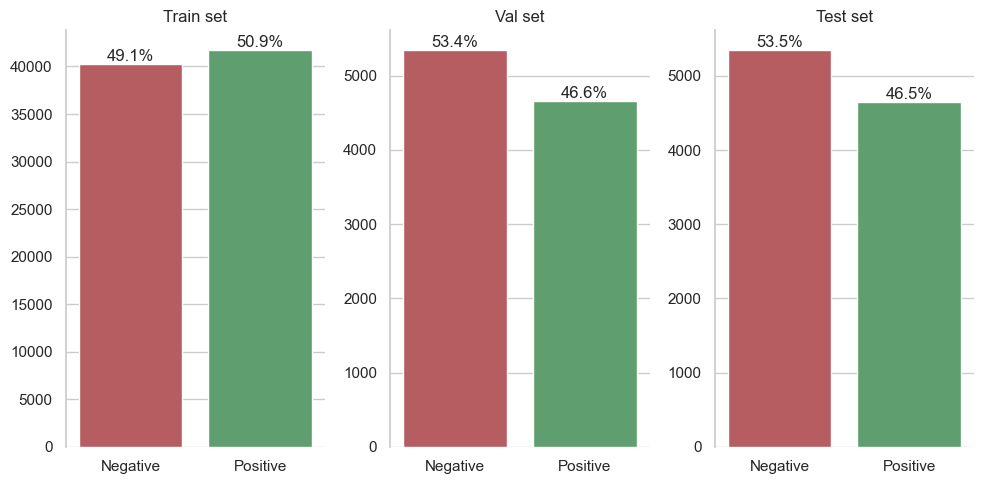

In [32]:
splits = [train_df, val_df, test_df]
titles = ["Train set", "Val set", "Test set"]

fig, ax = plt.subplots(1, len(splits), sharex=True, figsize=(10,5))
for i, (data, title) in enumerate(zip(splits, titles)):
    sns.countplot(data=data, x='polarity', palette=["r", "g"], ax=ax[i])
    ax[i].set(xlabel='', ylabel='')
    ax[i].set_xticklabels(['Negative', 'Positive']) 
    ax[i].set_title(title)
    
    # Frequencies
    ncount = len(data)
    for p in ax[i].patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax[i].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig.savefig('img/splits_polarity.png', dpi=200)

# Export

## To pickle

In [33]:
DATA_DIR = './../data'
os.makedirs(DATA_DIR)

In [34]:
# import pickle

# out_dict = {
#     'train_set': train_df,
#     'val_set': val_df,
#     'test_set': test_df,
#     'class_names': {0: 'Negative', 
#                     1: 'Positive'}
# }

# pickle_file = os.path.join(DATA_DIR, "allocine_dataset.pickle")
# with open(pickle_file, 'wb') as writer:
#     pickle.dump(out_dict, writer)

import pyarrow as pa
import pyarrow.parquet as pq

train_path = os.path.join(DATA_DIR, "train.parquet")
test_path = os.path.join(DATA_DIR, "test.parquet")
val_path = os.path.join(DATA_DIR, "validation.parquet")

table_train = pa.Table.from_pandas(train_df)
pq.write_table(table_train, train_path)

table_test = pa.Table.from_pandas(test_df)
pq.write_table(table_test, test_path)

table_val = pa.Table.from_pandas(val_df)
pq.write_table(table_val, val_path)

In [35]:
# with open(pickle_file, 'rb') as reader:
#     data = pickle.load(reader)
    
# print("LEN TRAIN: "+ str(len(data["train_set"])))
# print("LEN VAL: "+ str(len(data["val_set"])))
# print("LEN TEST: "+ str(len(data["test_set"])))

import pandas as pd
train = pd.read_parquet(train_path)
print(len(train))

test = pd.read_parquet(test_path)
print(len(test))

val = pd.read_parquet(val_path)
print(len(val))

82000
10000
10000


## Create archive

In [36]:
import tarfile

with tarfile.open("data.tar.bz2", "w:bz2") as tar:
    tar.add(DATA_DIR, arcname=os.path.basename(DATA_DIR))